### スパース推定 課題4回
#### B233311  田中悠

与えられたデータをもとに元の多項式を予測する．
問題より制限は「多項式の係数は ±1 または 0 である．」と
「多項式の係数の非ゼロ要素は 4 つだけである．また，x100 の
係数は非ゼロである．」である．

Python CVXPY を使ったハンズオン演習

In [1]:
# sparse+++

! pip install cvxpy
! pip install ecos


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\tanak\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\tanak\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


L1正則化付き最小二乗回帰によって得られた係数ベクトル x.value に基づき、多項式を予測する．
予測した係数を表示する．

status: optimal
optimal value 0.19349338916432363
optimal value 0.19349338916432363


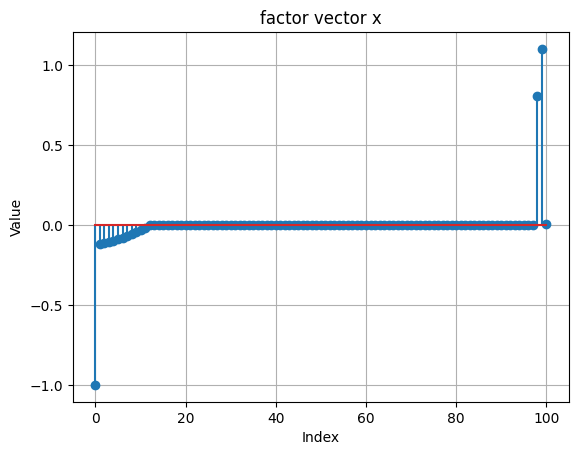

In [2]:
import numpy as np
import cvxpy as cp  # CVXPYをインポート
import matplotlib.pyplot as plt # グラフ描画用

n = 101
m=11
delta = 1/(m-1)
t = np.arange(0,1+delta,delta)
y = np.array([0.002286, 0.1261, 0.2440, 0.3950, 0.5516, 0.7502,
0.9696, 1.189, 1.465, 1.718, 0.03243])

lamb=0.05
# Extended Vandermonde matrix
Phi_e = np.vander(t,n)
# optimization variable
x = cp.Variable(n)
# cost function
cost = 0.5 * cp.sum_squares(Phi_e @ x - y) + lamb *cp.norm1(x)
# constraints
constraints = [x[0]==-1,-1.1<=x, x<=1.1]
# optimization problem
prob = cp.Problem(cp.Minimize(cost), constraints)
# solve by CVXPY
prob.solve()
# print the result
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal value", prob.value)


plt.stem(np.arange(n), x.value)
plt.title("factor vector x")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()


絶対値が1に近い4つの係数を選択してグラフをプロットする．

選ばれたインデックス: [ 0 99 98  1]
選ばれた係数の値: [-0.99999999  1.10000184  0.80844421 -0.11711828]


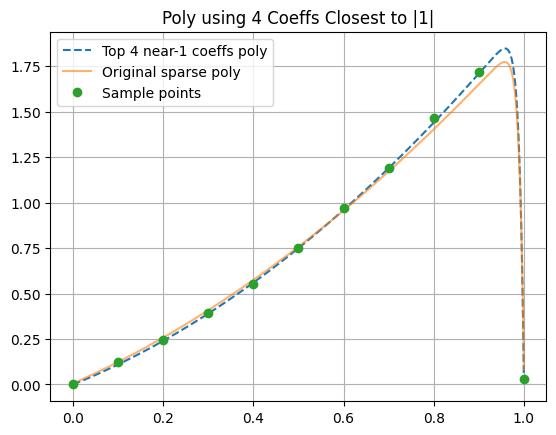

選ばれたインデックス: [ 0 99 98  1]
選ばれた係数の値: [-0.99999999  1.10000184  0.80844421 -0.11711828]


In [3]:
if x.value is not None:
    time = np.linspace(0, 1, 1000)
    # --- 絶対値が1に近い4つの係数を選択 ---
    abs_diff = np.abs(np.abs(x.value) - 1)  # |係数|と1の差
    top4_indices = np.argsort(abs_diff)[:4]  # 差が小さい順に4つ

    # 新しい係数ベクトル（他はゼロ）
    sparse_x = np.zeros_like(x.value)
    sparse_x[top4_indices] = np.sign(x.value[top4_indices])  # ±1 に設定

    print("選ばれたインデックス:", top4_indices)
    print("選ばれた係数の値:", x.value[top4_indices])   
    # --- 再構築された多項式の描画 ---
    fig, ax = plt.subplots()
    ax.plot(time, np.polyval(sparse_x, time), label='Top 4 near-1 coeffs poly', linestyle='--')
    ax.plot(time, np.polyval(x.value, time), label='Original sparse poly', alpha=0.6)
    #ax.plot(time, -time**100 - time**99 + time**2 + time, label='-x^100 - x^99 + x^2 + x')
    ax.plot(t, y, 'o', label='Sample points')
    ax.legend()
    ax.grid()
    ax.set_title("Poly using 4 Coeffs Closest to |1|")
    plt.show()

    print("選ばれたインデックス:", top4_indices)
    print("選ばれた係数の値:", x.value[top4_indices])


よって、予測される多項式は$-x^{100} -x^{99} +x^2 +x$となる．